# <img style="float: left; padding-right: 10px; width: 200px" src="https://raw.githubusercontent.com/trivikverma/researchgroup/master/assets/media/logo.png"> EPA-122A *Spatial* Data Science  


## Lab 3 - Part 2: Geo-Visualisation

**TU Delft**<br>
**Q2 2023**<br>
**Instructor:** Trivik Verma <br>
**[Centre for Urban Science & Policy]( https://cusp.tbm.tudelft.nl/)** <br>
---

## Table of Contents
* [Learning goals](#section0)
* [Loading spatial data](#section1)
* [Styling plots](#section2)
    * [Changing transparency](#section2_1)
    * [Removing axes](#section2_2)
    * [Adding title](#section2_3)
    * [Changing the size of the map](#section2_4)
    * [Scaling plots](#section2_5)
    * [Modifying borders](#section2_6)
    * [Transforming CRS](#section2_7)
* [Composing multi-layer maps](#section3)
* [Palettes](#section4)
* [Saving maps to figures](#section5)
* [Geodataframes](#section6)
    * [Non-spatial manipulations](#section6_1)
    * [Spatial manipulations](#section6_2)
* [Advanced skill](#section7)
    * [Extension 1: Adding base layers from web sources](#section7_1)
    * [Extension 2: Advanced GIS operations](#section7_2)
* [Advanced skill: Data mapping](#section8)
    * [Data](#section8_1)
    * [Choropleths](#section8_2)
        * [Unique values](#section8_2_1)
        * [Equal interval](#section8_2_2)
        * [Quantiles](#section8_2_3)
        * [Fisher-Jenks](#section8_2_4)
    * [Raster basemaps](#section8_3)
    * [Zooming into maps](#section8_4)

## Learning goals <a class="anchor" id="section0"></a>

1. Learn how to load, modify and visualise spatial data.
1. Extend previously developed visualisation skills to Geodata and how to combine these skills.

**NOTE** While there are certain sections marked as 'Advanced skill', it is highly recommended to properly peruse through the entire notebook.

In [1]:
%matplotlib inline

import os 
import geopandas as gpd
import palettable as pltt
from seaborn import palplot
import matplotlib.pyplot as plt

**Mapping in Python with `geopandas`** 

In this lab, we will learn how to load, manipulate and visualize spatial data. In some sense, spatial data has become so pervasive that nowadays, it is usually included simply as "one more column" in a table. However, *spatial is special* sometimes and there are few aspects in which geographic data differ from standard numerical tables. In this session, we will extend the skills developed in the previous one about non-spatial data, and combine them. In the process, we will discover that, despite some particularities, dealing with spatial data in Python largely resembles dealing with non-spatial data. 

For example, in this lab you will learn to make slick maps like this one with just a few commands:

![](figs/capetown.png)


To learn these concepts, we will be playing with the geography of Cape Town. Let us first set the path to the data folder again, as we did in the previous labs.

In [2]:
# This might have to look different in your computer
path = 'data/Capetown/'
os.listdir(path)

['Ocean',
 '.DS_Store',
 'Wards',
 'CapeTownPopulationData.csv',
 'Places',
 'Streets',
 'Rivers']

**IMPORTANT**: the paths above might look different in your computer. See the introductory lab-01 for more details about how to set your paths. 

## Loading up spatial data <a class="anchor" id="section1"></a>

The most direct way to get from a file to a quick visualization of the data is by loading it as a `GeoDataFrame` and calling the `plot` command. The main library employed for all of this is `geopandas` which is a geospatial extension of the `pandas` library, already introduced before. `geopandas` supports exactly the same functionality that `pandas` does (in fact since it is built on top of it, so most of the underlying machinery is pure `pandas`), plus a wide range of spatial counterparts that make manipulation and general "munging" of spatial data very similar to non-spatial tables.

In two lines of code, we will obtain a graphical representation of the spatial data contained in a file that can be in many formats; actually, since it uses the same drivers under the hood, you can load pretty much the same kind of vector files that QGIS permits. Let us start by plotting single layers in a crude but quick form, and we will build style and sophistication into our plots later on.

### Polygons <a class="anchor" id="section1_1"></a>

In [3]:
path = path + 'Wards/' # let#s navigate into the shapefile folder and safe the path 
gdf = gpd.read_file(path + 'Wards.shp') 
gdf.to_crs(epsg=4326, inplace=True) 
type(gdf)

geopandas.geodataframe.GeoDataFrame

Note how we have changed the `crs` (coorinate reference system) above. We have specified the coordinate system to EPSG 4326. You do not have to worry what that means exactly for the moment. Just keep in mind that there are different referencing systems. This will play a role when you start plotting geo dataframes.

Now `gdf` is a `GeoDataFrame`. Very similar to a traditional, non-spatial `DataFrame`, but with an additional column called `geometry`:

In [4]:
gdf.head()

OBJECTID WARD_NAME  WARD_YEAR  \
0       538         1       2021   
1       539         2       2021   
2       540         3       2021   
3       541         4       2021   
4       542         5       2021   

                                            geometry  
0  POLYGON ((18.59977 -33.88414, 18.60023 -33.884...  
1  POLYGON ((18.60374 -33.88949, 18.60438 -33.889...  
2  POLYGON ((18.67689 -33.89200, 18.67698 -33.892...  
3  POLYGON ((18.49863 -33.85767, 18.49947 -33.858...  
4  POLYGON ((18.55777 -33.82202, 18.55806 -33.822...

This allows us to quickly produce a plot by executing the following line:

<Axes: >

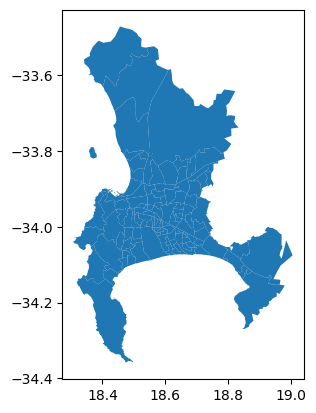

In [5]:
gdf.plot()

This might not be the most aesthetically pleasant visual representation of the geography, but it is hard to argue that it is not quick to produce. We will work on styling and customizing spatial plots later on.

**Pro-tip**: if you call a single row of the `geometry` column, it'll return a small plot ith the shape:

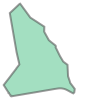

In [6]:
gdf.loc[0, 'geometry']

### Lines <a class="anchor" id="section1_2"></a>

Displaying lines is as straight-forward as polygons. To load highways in Cape Town and name the rows after the `id` column (or to "index" them):

In [7]:
# reset path 
path = 'data/Capetown/Streets/'
# Read file with streets
streets = gpd.read_file(path + 'Streets.shp')
# Print summary info
streets.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 203575 entries, 0 to 203574
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   FID       203575 non-null  int64   
 1   geometry  203575 non-null  geometry
dtypes: geometry(1), int64(1)
memory usage: 3.1 MB


In [8]:
streets

FID                                           geometry
0            0  LINESTRING (18.64714 -33.95390, 18.64715 -33.9...
1            1  LINESTRING (18.64714 -33.95390, 18.64706 -33.9...
2            2  LINESTRING (18.61160 -33.95112, 18.61162 -33.9...
3            3  LINESTRING (18.61160 -33.95112, 18.61144 -33.9...
4            4  LINESTRING (18.59830 -33.94803, 18.59807 -33.9...
...        ...                                                ...
203570  203570  LINESTRING (18.69964 -33.93245, 18.69966 -33.9...
203571  203571  LINESTRING (18.69952 -33.93271, 18.69964 -33.9...
203572  203572  LINESTRING (18.71625 -33.93163, 18.71479 -33.9...
203573  203573  LINESTRING (18.71625 -33.93163, 18.71631 -33.9...
203574  203574  LINESTRING (18.71625 -33.93163, 18.71623 -33.9...

[203575 rows x 2 columns]

Note how, similarly to the polygon case, if we pick the `"geometry"` column of a table with lines, a single row will display the geometry as well:

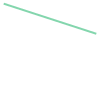

In [9]:
streets.loc[167964, 'geometry']

Note that there is a new column called `FID`. GIS (Geographic Inforamtion System) automatically adds an identifier column to the geo dataframe if missing. `FID` here simply means feature ID. The FID column resembles the index that is also created automatically when we create a dataframe.

<Axes: >

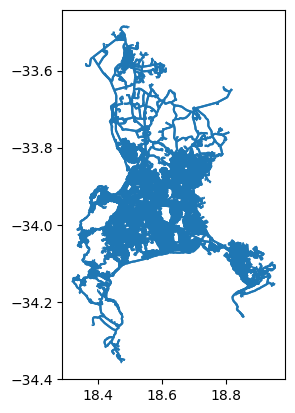

In [10]:
streets.plot()

Again, this is not the prettiest way to display the roads maybe, and you might want to change a few parameters such as colors, etc. All of this is possible, as we will see below, but this gives us a quick check of what lines look like.

### Points <a class="anchor" id="section1_3"></a>

Finally, points follow a similar structure. If we want to represent named places in Cape Town:

In [11]:
# reset path again
path = 'data/Capetown/Places/'
namp = gpd.read_file(path + 'amenities.shp') 
# remember that we already set path to navigate into the shapefile folder 
namp.head()

osmid     amenity             name  addr_city addr_house addr_postc  \
0  26310715  restaurant  Cincinnati Spur       None       None       None   
1  26313138  restaurant      Magica Roma  Pinelands          8       7405   
2  49998219  restaurant           Saul's       None       None       None   
3  49998251  restaurant        Anatoli's       None       None       None   
4  50000875  restaurant         Il Leone       None         22       8001   

       addr_stree  cuisine diet_vegan                        opening_ho  ...  \
0            None     None       None                              None  ...   
1  Central Square  italian         no  Mo-Fr 12:00+, Mo-Sa 18:00-22:00+  ...   
2            None     None       None                              None  ...   
3            None     None       None                              None  ...   
4   Cobern Street  italian       None                              None  ...   

  min_age theme cash_withd kids_area kids_area_ kids_are_1 kids_are_2  \
0    None  None       None      None       None       None       None   
1    None  None       None      None       None       None       None   
2    None  None       None      None       None       None       None   
3    None  None       None      None       None       None       None   
4    None  None       None      None       None       None       None   

  kids_are_3 payment__5                    geometry  
0       None       None  POINT (18.51037 -33.93304)  
1       None       None  POINT (18.49787 -33.94023)  
2       None       None  POINT (18.41845 -33.91480)  
3       None       None  POINT (18.41874 -33.91470)  
4       None       None  POINT (18.41892 -33.91432)  

[5 rows x 142 columns]

Note how this import is coming with an index column already: `osmid` stands for open street map id. We will see how to work with open street map next week.

And the plot is produced by running:

<Axes: >

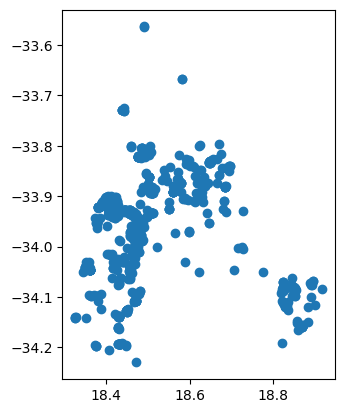

In [12]:
namp.plot()

## Styling plots <a class="anchor" id="section2"></a>

It is possible to tweak several aspects of a plot to customize if to particular needs. In this section, we will explore some of the basic elements that will allow us to obtain more compelling maps.

**NOTE**: some of these variations are very straightforward while others are more intricate and require tinkering with the internal parts of a plot. They are not necessarily organized by increasing level of complexity.

### Changing transparency <a class="anchor" id="section2_1"></a>

The intensity of color of a polygon can be easily changed through the `alpha` attribute in plot. This is specified as a value betwee zero and one, where the former is entirely transparent while the latter is the fully opaque (maximum intensity):

<Axes: >

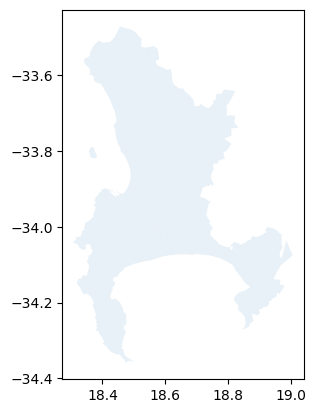

In [13]:
gdf.plot(alpha=0.1)

<Axes: >

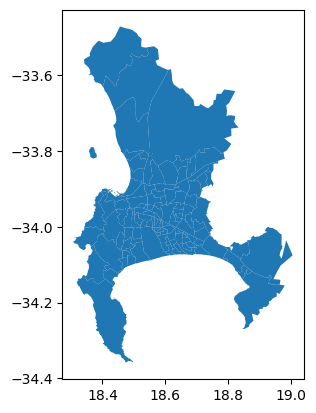

In [14]:
gdf.plot(alpha=1)

### Removing axes <a class="anchor" id="section2_2"></a>

Although in some cases, the axes can be useful to obtain context, most of the times maps look and feel better without them. Removing the axes involves wrapping the plot into a figure, which takes a few more lines of aparently useless code but that, in time, it will allow you to tweak the map further and to create much more flexible designs:

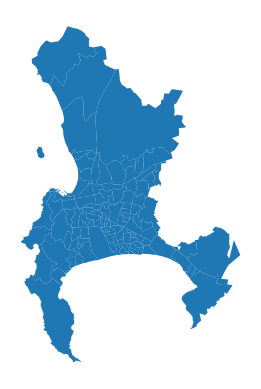

In [15]:
# Setup figure and axis
f, ax = plt.subplots(1)
# Plot layer of polygons on the axis
gdf.plot(ax=ax)
# Remove axis frames
ax.set_axis_off()
# Display
plt.show()

Let us stop for a second a study each of the previous lines:

1. We have first created a figure named `f` with one axis named `ax` by using the command `plt.subplots` (part of the library `matplotlib`, which we have imported at the top of the notebook). Note how the method is returning two elements and we can assign each of them to objects with different name (`f` and `ax`) by simply listing them at the front of the line, separated by commas.
1. Second, we plot the geographies as before, but this time we tell the function that we want it to draw the polygons on the axis we are passing, `ax`. This method returns the axis with the geographies in them, so we make sure to store it on an object with the same name, `ax`.
1. On the third line, we effectively remove the box with coordinates.
1. Finally, we draw the entire plot by calling `plt.show()`.

### Adding a title <a class="anchor" id="section2_3"></a>

Adding a title is an extra line, if we are creating the plot within a figure, as we just did. To include text on top of the figure:

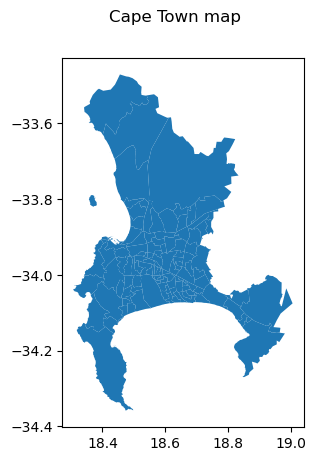

In [16]:
# Setup figure and axis
f, ax = plt.subplots(1)
# Add layer of polygons on the axis
gdf.plot(ax=ax)
# Add figure title
f.suptitle('Cape Town map')
# Display
plt.show()

### Changing the size of the map <a class="anchor" id="section2_4"></a>

The size of the plot is changed equally easily in this context. The only difference is that it is specified when we create the figure with the argument `figsize`. The first number represents the width, the X axis, and the second corresponds with the height, the Y axis.

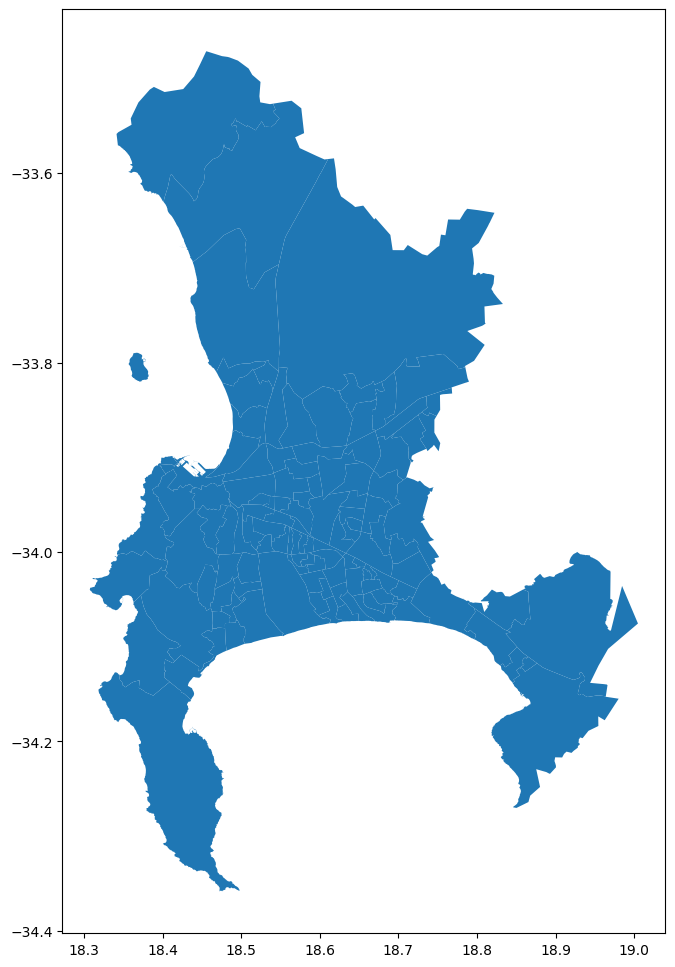

In [17]:
# Setup figure and axis with different size
f, ax = plt.subplots(1, figsize=(12, 12))
# Add layer of polygons on the axis
gdf.plot(ax=ax)
# Display
plt.show()

### Scaling plots <a class="anchor" id="section2_5"></a>

You will notice that the ability to change the size of the figure is very powerful as it makes possible to obtain many different sizes and shapes for plots. However, this also may introduce some distortions in the way the shapes are represented. For example, a very wide figure can make the viewer think that polygons are in reality more "stretched out" than they are in reality:

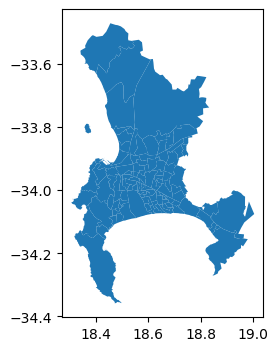

In [18]:
# Setup figure and axis with different size
f, ax = plt.subplots(1, figsize=(12, 4))
# Add layer of polygons on the axis
ax = gdf.plot(ax=ax)
# Display
plt.show()

Although in some contexts this may be desirable (or at least, accepted), in many it will not. From a cartographic point of view, maps need to be as good representatios of reality as they can. We can ensure the scaling ratio between both axes remains fixed, whichever the shape of the figure. To do this, we only need to add a single extra line of code: `plt.axis("equal")`.

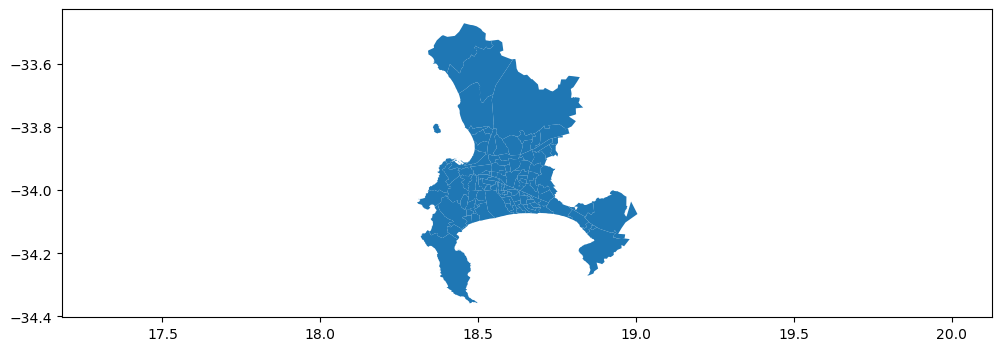

In [19]:
# Setup figure and axis with different size
f, ax = plt.subplots(1, figsize=(12, 4))
# Add layer of polygons on the axis
gdf.plot(ax=ax)
# Force axis to be on the same unit
plt.axis('equal')
# Display
plt.show()

### Modifying borders <a class="anchor" id="section2_6"></a>

Border lines sometimes can distort or impede proper interpretation of a map. In those cases, it is useful to know how they can be modified. Although not too complicated, the way to access borders in `geopandas` is not as straightforward as it is the case for other aspects of the map, such as size or frame. Let us first see the code to make the *lines thinner* and *grey*, and then we will work our way through the different steps:

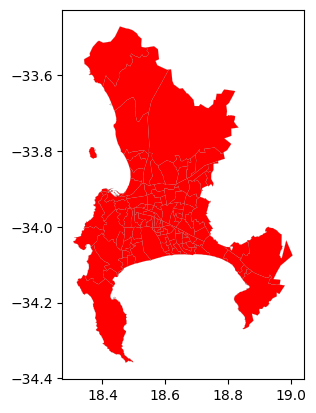

In [20]:
# Setup figure and axis
f, ax = plt.subplots(1)
# Add layer of polygons on the axis, set fill color (`facecolor`) and boundary
# color (`edgecolor`)
gdf.plot(linewidth=0.1, facecolor='red', edgecolor='grey', ax=ax)
# Display
plt.show()

Note how the lines are much thinner and discreet. In addition, all the polygons are colored in the same (default) color, light red.

Let us examine line by line what we are doing in the code snippet:

* We begin by creating the figure (`f`) object and one axis inside it (`ax`) where we will plot the map.
* Then, we call `plot` as usual, but pass in two new arguments: `facecolor`, to control the color each polygon is filled with, and `edgecolor`, to control the color of the boundary.
* Draw the map using `plt.show()`.

This approach works very similarly with other geometries, such as lines. For example, if we wanted to plot the highways in red, we would simply:

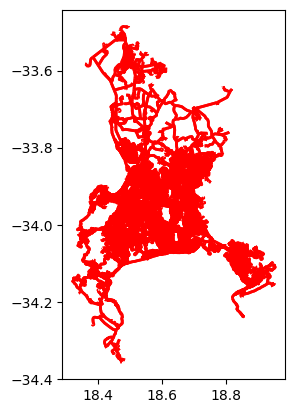

In [21]:
# Setup figure and axis
f, ax = plt.subplots(1)
# Add layer with lines, set them red and with different line width
# and append it to the axis `ax`
streets.plot(linewidth=2, color='red', ax=ax)
# Display
plt.show()

Important, note that in the case of lines the parameter to control the color is simply `color`. This is because lines do not have an area, so there is no need to distinguish between the main area (`facecolor`) and the border lines (`edgecolor`).

### Transforming CRS <a class="anchor" id="section2_7"></a>

The coordindate reference system (CRS) is the way geographers and cartographers have to represent a three-dimentional object, such as the round earth, on a two-dimensional plane, such as a piece of paper or a computer screen. If the source data contain information on the CRS of the data, we can modify this in a `GeoDataFrame`. First let us check if we have the information stored properly:

In [22]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

As we can see, there is information stored about the reference system: it is using the datum "EPSG3857", which is a projection in meters (`m` in units). There are also other less decipherable parameters but we do not need to worry about them right now.

If we want to modify this and "reproject" the polygons into a different CRS, the quickest way is to find the [EPSG](https://en.wikipedia.org/wiki/International_Association_of_Oil_%26_Gas_Producers#European_Petroleum_Survey_Group) code online ([epsg.io](http://epsg.io/) is a good one, although there are others too). For example, if we wanted to transform the dataset into lat/lon coordinates, we would use its EPSG code, 4326:

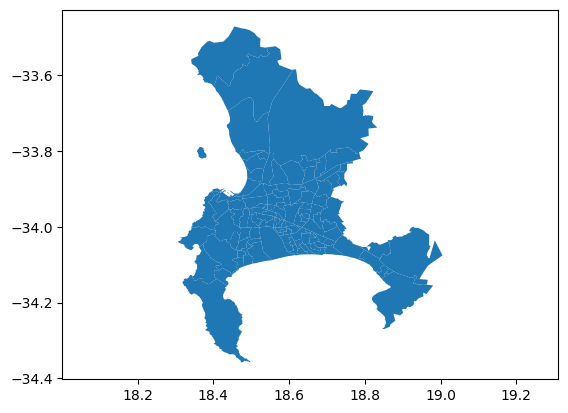

In [23]:
# Reproject (`to_crs`) and plot (`plot`) polygons
gdf.to_crs(epsg=4326).plot()
# Set equal axis
lims = plt.axis('equal')

Because the area we are visualizing is not very large, the shape of the polygons is roughly the same. However, note how the *scale* in which they are plotted differs: while before we had coordinate points ranging 332,000 to 398,000, now these are expressed in degrees, and range from -3.05 to -2,80 on the longitude, and between 53.32 and 53.48 on the latitude.

---

## Composing multi-layer maps <a class="anchor" id="section3"></a>

So far we have considered many aspects of plotting *a single* layer of data. However, in many cases, an effective map will require more than one: for example we might want to display streets on top of the polygons of neighborhoods, and add a few points for specific locations we want to highlight. At the very heart of GIS is the possibility to combine spatial information from different sources by overlaying it on top of each other, and this is fully supported in Python.

Essentially, combining different layers on a single map boils down to adding each of them to the same axis in a sequential way, as if we were literally overlaying one on top of the previous one. For example, let us get the most direct plot, one with the polygons and the streets on top of them:

In [24]:
gdf

OBJECTID WARD_NAME  WARD_YEAR  \
0         538         1       2021   
1         539         2       2021   
2         540         3       2021   
3         541         4       2021   
4         542         5       2021   
..        ...       ...        ...   
111       649       112       2021   
112       650       113       2021   
113       651       114       2021   
114       652       115       2021   
115       653       116       2021   

                                              geometry  
0    POLYGON ((18.59977 -33.88414, 18.60023 -33.884...  
1    POLYGON ((18.60374 -33.88949, 18.60438 -33.889...  
2    POLYGON ((18.67689 -33.89200, 18.67698 -33.892...  
3    POLYGON ((18.49863 -33.85767, 18.49947 -33.858...  
4    POLYGON ((18.55777 -33.82202, 18.55806 -33.822...  
..                                                 ...  
111  POLYGON ((18.65257 -33.82736, 18.65277 -33.827...  
112  POLYGON ((18.52089 -33.81789, 18.52214 -33.820...  
113  POLYGON ((18.66235 -33.98068, 18.66284 -33.980...  
114  POLYGON ((18.43252 -33.89832, 18.42866 -33.899...  
115  POLYGON ((18.63192 -34.04489, 18.63056 -34.045...  

[116 rows x 4 columns]

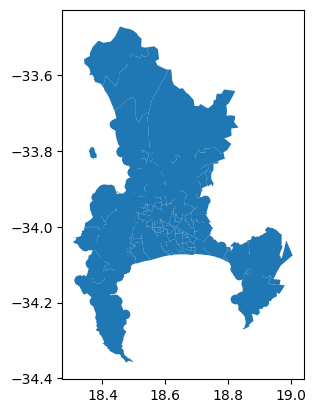

In [25]:
# Setup figure and axis
f, ax = plt.subplots(1)
# Add a layer with polygons on to axis `ax`
gdf.plot(ax=ax)
# Add a layer with lines on top in axis `ax`
namp.plot(ax=ax)
# Display
plt.show()

Because the default colors are not really designed to mix and match several layers, it is hard to tell them apart. However, we can use all the skills and tricks learned on styling a single layer, to make a multi-layer more sophisticated and, ultimately, useful.

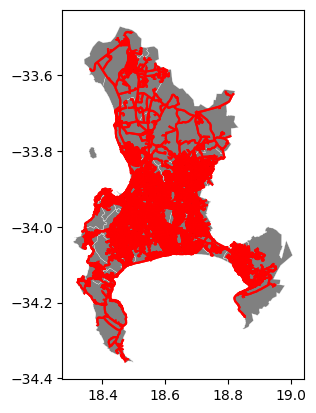

In [26]:
# Setup figure and axis
f, ax = plt.subplots(1)
# Add a layer with polygons on to axis `ax`
gdf.plot(ax=ax, facecolor='grey', edgecolor='white', linewidth=0.2)
# Add a layer with lines on top in axis `ax`
streets.plot(ax=ax, color='red')
# Display
plt.show()

Note how we are plotting streets onto the map now, instead of amenities (as we did above)

---

### <div class="exercise"><b>Exercise</b></div>
**Create a similar map to the one above, but replace the highways by the named places points used at the beginning (and saved into `namp`). Do not try to set the color to green or any other particular one, but you can play with the size of the dot.**

---

## Using palettes to create aesthetically pleasant maps <a class="anchor" id="section4"></a>

The choice of colors can influence the look and, ultimately, the effectiveness of a map. Although in some cases picking colors that simply allow you to distinguish the different elements might suffice, sometimes, you want to convey certain feelings (warmth, safety, etc.). In those cases, using preexisting palettes can be useful.

In this section, we will learn how to use pre-existent palettes to style your maps. We will be using the library [`palettable`](https://jiffyclub.github.io/palettable/), which provides many "canned" palettes. We will also use the handy function `palplot` (from the library `seaborn`) to examine the colors quickly.

For the sake of the example, let us use a palette based on one of Wes Anderson's movies, Darjeeling Limited:

<img src='http://66.media.tumblr.com/2815b755b493555dd4a74fc9f7c84bdb/tumblr_nj7cclt9qb1tvvqeko1_500.jpg'></img>

Here is how you can pull out those colors:

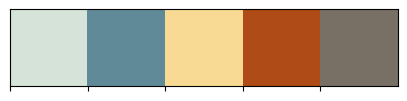

In [27]:
wes = pltt.wesanderson.Darjeeling2_5.hex_colors
palplot(wes)

Now, note how the object `wes` simply contains a list of colors in the hex standard:

In [28]:
wes

['#D5E3D8', '#618A98', '#F9DA95', '#AE4B16', '#787064']

We will use these to style our map. For the sake of the example, let us use the following layers, available from the OS pack:

* `Ocean`
* `Road`
* `River`
* `Amenities`
* `And the polygons used above`.

Let us first read those in:

In [29]:
# NOTE: this might take a little bit depending on the machine
#reset path 
path = 'data/Capetown/'
ocean = gpd.read_file(path + '/Ocean/capetown_ocean_polygon.shp')
bay = gpd.read_file(path + 'Ocean/FalseBay.shp')
rivers = gpd.read_file(path + 'Rivers/Rivers.shp')
ocean.to_crs(epsg=4326, inplace=True)
bay.to_crs(epsg=4326, inplace=True)
rivers.to_crs(epsg=4326, inplace=True)


Technically speaking, there is nothing new to learn, other than keeping in mind that we need to add the layers in the right order. Let's go for it:

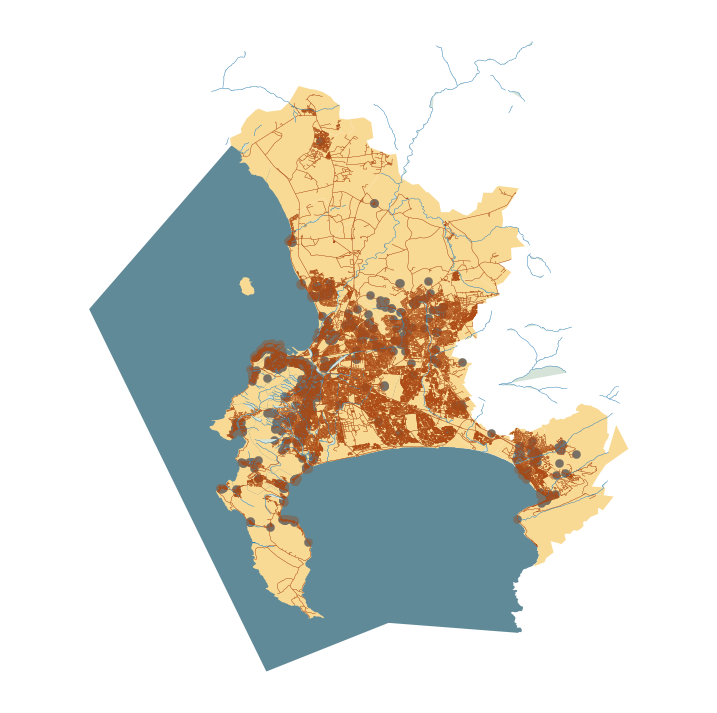

In [30]:
# NOTE: this might take a little bit depending on the machine

# Setup figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))
# ocean

ocean.plot(ax=ax, facecolor='#618A98', linewidth=0.)
bay.plot(ax=ax, color='#618A98')

gdf.plot(ax=ax, facecolor='#F9DA95', edgecolor='#F9DA95', linewidth=0.)
# Add roads
streets.plot(ax=ax, color='#AE4B16', linewidth=0.2)
# Add functional sites (remove boundary lines for the polygons)

namp.plot(ax=ax, facecolor='#787064', linewidth=0.2)
# Add rivers
rivers.plot(ax=ax, facecolor='#D5E3D8', linewidth=0.3)

# Remove axes
ax.set_axis_off()
# Impose same size for units across axes
plt.axis('equal')
plt.savefig('figs/capetown.png',transparent=True)
# Display
plt.show()

## Saving maps to figures <a class="anchor" id="section5"></a>

Once we have produced a map we are content with, we might want to save it to a file so we can include it into a report, article, website, etc. Exporting maps in Python involves replacing `plt.show` by `plt.savefig` at the end of the code block to specify where and how to save it. For example to save the previous map into a `png` file in the same folder where the notebook is hosted:

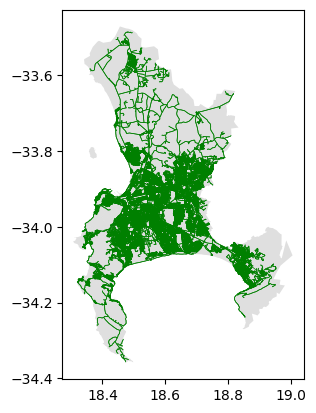

In [31]:
# Set up figure and axes
f, ax = plt.subplots(1)
# Plot polygon layer
gdf.plot(ax=ax, facecolor='grey', alpha=0.25, linewidth=0.1)
# Plot line layer
streets.plot(ax=ax, color='green', linewidth=0.5)
# Save figure to a PNG file
plt.savefig('CapetownStreets.png')

If you now check on the folder, you'll find a `png` (image) file with the map.

The command `plt.savefig` contains a large number of options and additional parameters to tweak. Given the size of the figure created is not very large, we can increase this with the argument `dpi`, which stands for "dots per inch" and it's a standard measure of resolution in images. For example, for a high definition (HD) quality image, we can use 1080:

**[Note]**: if this takes too long, try with 500 instead, which will still give you a good quality image that renders more easily.

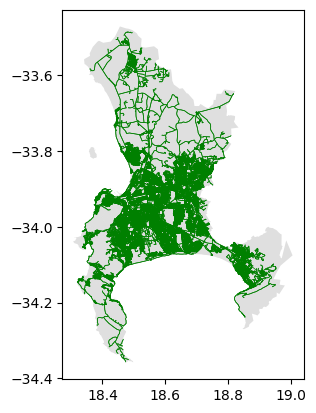

In [32]:
# Set up figure and axes
f, ax = plt.subplots(1)
# Plot polygon layer
gdf.plot(ax=ax, facecolor='grey', alpha=0.25, linewidth=0.1)
# Plot line layer
streets.plot(ax=ax, color='green', linewidth=0.5)
# Save figure to a PNG file
plt.savefig('CapetownStreets.png', dpi=1080)

## `GeoDataFrames`(Manipulating spatial tables) <a class="anchor" id="section6"></a>

Once we have an understanding of how to visually display spatial information contained, let us see how it can be combined with the operations learnt in the previous session about manipulating non-spatial tabular data. Essentially, the key is to realize that a `GeoDataFrame` contains most of its spatial information in a single column named `geometry`, but the rest of it looks and behaves exactly like a non-spatial `DataFrame` (in fact, it is). This concedes them all the flexibility and convenience that we saw in manipulating, slicing, and transforming tabular data, with the bonus that spatial data is carried away in all those steps. In addition, `GeoDataFrames` also incorporate a set of explicitly spatial operations to combine and transform data. In this section, we will consider both.

Let us refresh some of the techniques we learned in the previous session about non-spatial tabular data and see how those can be combined with the mapping of their spatial counter-parts. To do this, we will revisit the population data we explored in the previous section:

In [33]:
import pandas as pd

# Set the path to the location of the Cape Town data from the first practical
# just as you did at the beginning of the previous session
tab_path = 'data//Capetown/CapeTownPopulationData.csv'

Remember the data we want need to be extracted and renamed for the variables to have human readable names. Here we will do it all in one shot, but you can go back to the notebook of the previous session to follow the steps in more detail.

In [34]:
# Read file in
census = pd.read_csv(tab_path)
# Display top of table
census.head()

WARD_NAME                Sex         Male       Female        Total
0          1  19100001 : Ward 1  12576.51819  13857.55526  26434.07345
1          2  19100002 : Ward 2  13794.44454  16119.74539  29914.18993
2          3  19100003 : Ward 3  12254.37793  13481.24457  25735.62250
3          4  19100004 : Ward 4  16936.52211  16427.63671  33364.15882
4          5  19100005 : Ward 5  12899.42156  11581.34656  24480.76812

* Join tabular data

Now we have both tables loaded into the session: on the one hand, the spatial data are contained in `gdf`, while all the tabular data are in `census`. To be able to work with the two together, we need to *connect* them. In `pandas` language, this is called "join" and the key element in joins are the *indices*, the names assigned to each row of the tables. This is what we determine, for example, when we indicate `index_col` when reading a `csv`. In the case above, the index is set on `WARD_NAME`. To make the join operation work. The data types of the `WARD_NAME` column needs to match in both datasets. 

In [35]:
gdf.head()

OBJECTID WARD_NAME  WARD_YEAR  \
0       538         1       2021   
1       539         2       2021   
2       540         3       2021   
3       541         4       2021   
4       542         5       2021   

                                            geometry  
0  POLYGON ((18.59977 -33.88414, 18.60023 -33.884...  
1  POLYGON ((18.60374 -33.88949, 18.60438 -33.889...  
2  POLYGON ((18.67689 -33.89200, 18.67698 -33.892...  
3  POLYGON ((18.49863 -33.85767, 18.49947 -33.858...  
4  POLYGON ((18.55777 -33.82202, 18.55806 -33.822...

In [36]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   WARD_NAME  116 non-null    int64  
 1   Sex        116 non-null    object 
 2   Male       116 non-null    float64
 3   Female     116 non-null    float64
 4   Total      116 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 4.7+ KB


As you can see one column is stored as ``object`` and the other one is stored as ``float``. We will change the ``object`` datatype to ``float``.

In [37]:
gdf.WARD_NAME = gdf.WARD_NAME.astype(float)

Having the same column, albeit originally in different data types, in both tables thus allows us to combine, *"merge"*, the two into a single one where rows are matched that we will call `geo_pop`:

In [38]:
geo_pop = gdf.merge(census, on='WARD_NAME')
geo_pop.head()

OBJECTID  WARD_NAME  WARD_YEAR  \
0       538        1.0       2021   
1       539        2.0       2021   
2       540        3.0       2021   
3       541        4.0       2021   
4       542        5.0       2021   

                                            geometry                Sex  \
0  POLYGON ((18.59977 -33.88414, 18.60023 -33.884...  19100001 : Ward 1   
1  POLYGON ((18.60374 -33.88949, 18.60438 -33.889...  19100002 : Ward 2   
2  POLYGON ((18.67689 -33.89200, 18.67698 -33.892...  19100003 : Ward 3   
3  POLYGON ((18.49863 -33.85767, 18.49947 -33.858...  19100004 : Ward 4   
4  POLYGON ((18.55777 -33.82202, 18.55806 -33.822...  19100005 : Ward 5   

          Male       Female        Total  
0  12576.51819  13857.55526  26434.07345  
1  13794.44454  16119.74539  29914.18993  
2  12254.37793  13481.24457  25735.62250  
3  16936.52211  16427.63671  33364.15882  
4  12899.42156  11581.34656  24480.76812

Let us quickly run through the logic of merge:

* First, it is an operation in which you are "attaching" some data to a previously existing one. This does not always need to be like this but, for now, we will only consider this case. In particular, in the operation above, we are attaching the population data in `census` to the spatial table `gdf`.
* Second, note how the main table does not need to be indexed in the shared column for the join to be possible, it only needs to contain it. In this case, the index of `gdf` is a sequence, but the relevant codes are stored in the column `WARD_NAME`.
* Finally, note how the merge operation contains two arguments: one is obviously the table we want to attach; the second one, preceded by "`on`" relates to the column in the main table that is required to be matched with the index of the table being attached. In this case, the relevant ID codes are in the column `WARD_NAME`, so we specify that.

One final note, earlier versions of `geopandas` appears to have a bug in the code that makes the merged table to loose the CRS. If this is the case, reattaching it is straightforward:

In [39]:
geo_pop.crs = gdf.crs

### Non-spatial manipulations <a class="anchor" id="section6_1"></a>

Once we have joined spatial and non-spatial data, we can use the techniques learned in manipulating and slicing non-spatial tables to create much richer maps. In particular, let us recall the example we worked through in the previous session in which we were selecting rows based on their population characteristics. In addition to being able to to select them, now we will also be able to visualize them in maps.

For example, let us select again the ten smallest areas of Cape Town (note how we pass a number to `head` to keep that amount of rows):

In [40]:
smallest = geo_pop.sort_values('Total').head(10)

Now we can make a map of Cape Town and overlay on top of them these areas:

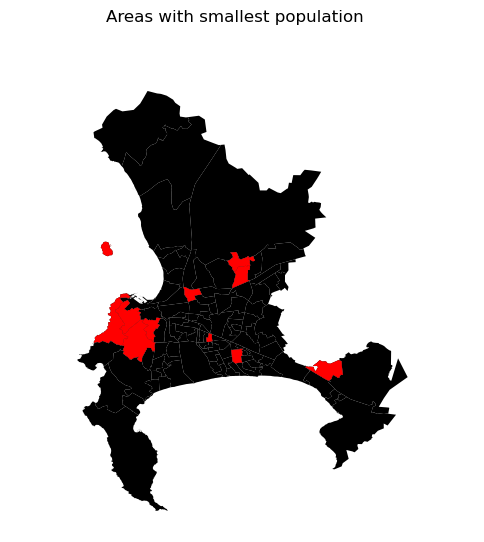

In [41]:
f, ax = plt.subplots(1, figsize=(6, 6))
# Base layer with all the areas for the background
geo_pop.plot(facecolor='black', linewidth=0.025, ax=ax)
# Smallest areas
smallest.plot(alpha=1, facecolor='red', linewidth=0, ax=ax)
ax.set_axis_off()
f.suptitle('Areas with smallest population')
plt.axis('equal')
plt.show()

---

#### <div class="exercise"><b>Exercise</b></div>
**Create a map of Capetown with the two largest areas for each of the different population subgroups in a different color each.**

---

### Spatial manipulations <a class="anchor" id="section6_2"></a>

In addition to operations purely based on values of the table, as above, `GeoDataFrame`s come built-in with a whole range of traditional GIS operations. Here we will run through a small subset of them that contains some of the most commonly used ones.

* Centroid calculation

Sometimes it is useful to summarize a polygon into a single point and, for that, a good candidate is its centroid (almost like a spatial analogue of the average). The following command will return a `GeoSeries` (a single column with spatial data) with the centroids of a polygon `GeoDataFrame`:

In [42]:
geo_pop.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [43]:

# We have to change the EPSG for the following operations 
# We have set all our geometry to EPSG:4326, which does not account for the earth's curvature. 
# The centroid calculations are accounting for the curvature of the earth, so we will have to change to an EPSG that accounts for curvature. 
# EPGS:32632 does that.

geo_pop_projected = geo_pop.to_crs('EPSG:32632') #change EPSG

# Now calculate centroids
cents = geo_pop_projected.centroid

# View the result
cents.head()

0    POINT (1386850.683 -3788425.892)
1    POINT (1388796.707 -3792264.648)
2    POINT (1394681.095 -3792527.118)
3    POINT (1381386.422 -3788025.979)
4    POINT (1384542.653 -3787041.993)
dtype: geometry

Note how `cents` is not an entire table but a single column, or a `GeoSeries` object. This means you can plot it directly, just like a table:

<Axes: >

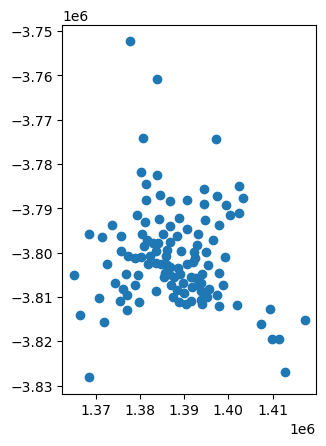

In [44]:
cents.plot()

But you don't need to call a `geometry` column to inspect the spatial objects. In fact, if you do it will return an error because there is not any `geometry` column, the object `cents` itself is the geometry.

---

#### <div class="exercise"><b>Exercise</b></div>
**Create a map with the polygons of Cape Town in the background and overlay on top of them their centroids.**

---

* Point in polygon (PiP)

Knowing whether a point is inside a polygon is conceptually a straightforward exercise but computationally a tricky task to perform. The way to perform this operation in `GeoPandas` is through the `contains` method, available for each polygon object.

In [45]:
poly = geo_pop['geometry'][0]
pt1 = cents[0]
pt2 = cents[1]

In [46]:
poly.contains(pt1)

False

In [47]:
poly.contains(pt2)

False

Performing point-in-polygon in this way is instructive and useful for pedagogical reasons, but for cases with many points and polygons, it is not particularly efficient. In these situations, it is much more advisable to perform then as a "spatial join". If you are interested in these, see the link provided below to learn more about them. 

https://geopandas.readthedocs.io/en/latest/gallery/spatial_joins.html

---

#### <div class="exercise"><b>Exercise</b></div>
**This one is fairly advanced, so do not dispair if you cannot solve it. Find in which polygons the named places in `namp` fall into. Return, for each named place, the location code in which it is located.**


---

* Buffers

Buffers are one of the classical GIS operations in which an area is drawn around a particular geometry, given a specific radious. These are very useful, for instance, in combination with point-in-polygon operations to calculate accessibility, catchment areas, etc.

To create a buffer using `geopandas`, simply call the `buffer` method, passing in the radious. Mind that the radious needs to be specified in the same units as the CRS of the geography you are working with. For example, for the named places, we can consider their CRS:

In [48]:
namp.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

These tells us it uses projection 27700 in the EPSG system. If we [look it up](http://epsg.io/27700), we will find that this corresponds with the Ordnance Survey projection, which is expressed in metres. Hence if we want, for example, a buffer of 500m. around each of these places, we can simply obtain it by:

In [49]:
# Let's change the EPSG again to account for curvature

namp = namp.to_crs('EPSG:32632')
buf = namp.buffer(500)
buf.head()

0    POLYGON ((1380975.898 -3795749.682, 1380973.49...
1    POLYGON ((1379740.476 -3796442.044, 1379738.06...
2    POLYGON ((1372625.320 -3792921.914, 1372622.91...
3    POLYGON ((1372653.046 -3792913.330, 1372650.63...
4    POLYGON ((1372673.619 -3792872.591, 1372671.21...
dtype: geometry

And plotting it is equally straighforward:

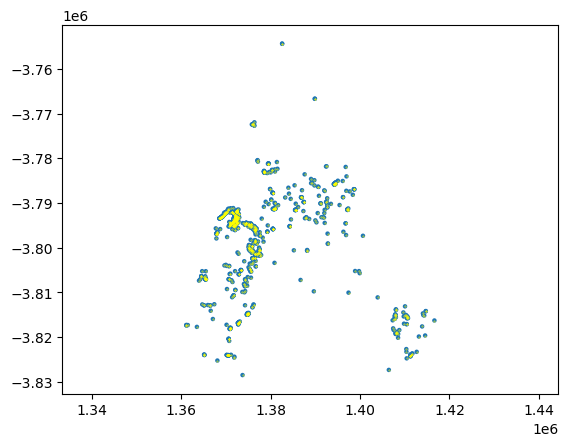

In [50]:
f, ax = plt.subplots(1)
# Plot buffer
buf.plot(ax=ax, linewidth=0)
# Plot named places on top for reference
# [NOTE how we modify the dot size (`markersize`)
# and the color (`color`)]
namp.plot(ax=ax, markersize=.1, color='yellow')
plt.axis('equal')
plt.show()

---

#### <div class="exercise"><b>Exercise</b></div>
**Generate a map of the Capetown polygons in black and overlay on top of them yellow buffers of 250 metres around each centroid.**



---
## Advanced skill <a class="anchor" id="section7"></a>
The folowing are extensions and as such are not required to complete this section. They are intended as additional resources to explore further possibilities that Python allows to play with representing spatial data.

### `[Extension I]` Adding base layers from web sources <a class="anchor" id="section7_1"></a>

A popular use of rasters is in the context of web tiles, which are a way of quickly obtaining geographical context to present spatial data. In Python, we can use [`contextily`](https://github.com/darribas/contextily) to pull down tiles and display them along with our own geographic data. Let us first import it the package:

In [51]:
import contextily as cx

We can begin by creating a map in the same way we would do normally, and then use the `add_basemap` command to, er, add a basemap:

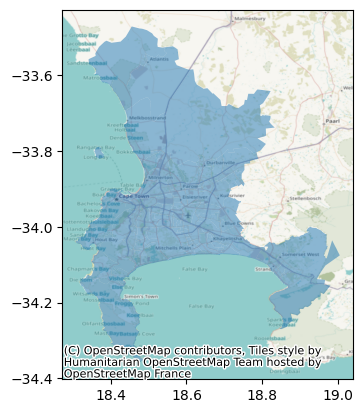

In [52]:
ax = gdf.plot(alpha=0.5)
cx.add_basemap(ax, crs=gdf.crs);

Note that we need to be explicit when adding the basemap to state the coordinate reference system (`crs`) our data is expressed in, `contextily` will not be able to pick it up otherwise. Conversely, we could change our data's CRS into [Pseudo-Mercator](http://epsg.io/3857), the native reference system for most web tiles:

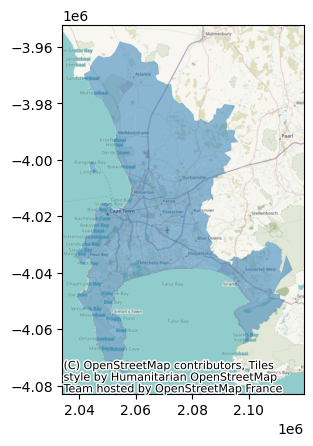

In [53]:
gdf_wm = gdf.to_crs(epsg=3857)
ax = gdf_wm.plot(alpha=0.5)
cx.add_basemap(ax);

Note how the coordinates are different but, if we set it right, either approach aligns tiles and data nicely.

Web tiles can be integrated with other features of maps in a similar way as we have seen above. So, for example, we can change the size of the map, and remove the axis:

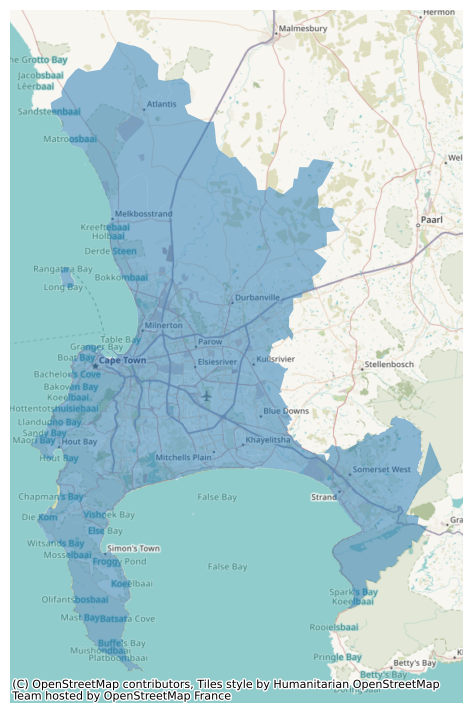

In [54]:
f, ax = plt.subplots(1, figsize=(9, 9))
gdf_wm = gdf.to_crs(epsg=3857)
gdf_wm.plot(alpha=0.5, ax=ax)
cx.add_basemap(ax)
ax.set_axis_off()

Now, `contextily` offers a lot of options in terms of the sources and providers you can use to create your basemaps. For example, we can use satellite imagery instead:

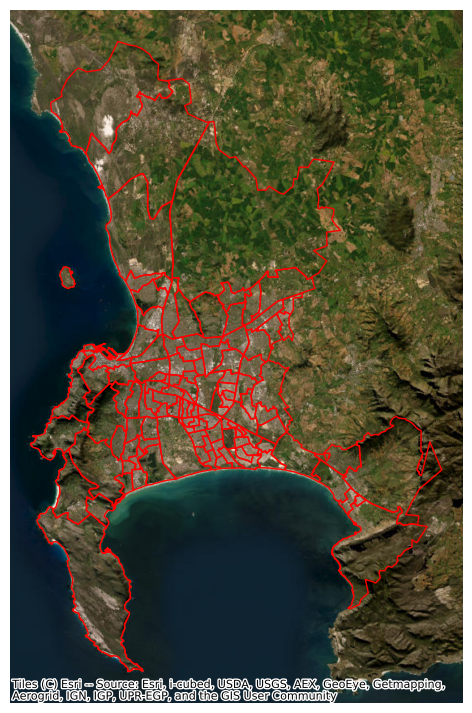

In [55]:
f, ax = plt.subplots(1, figsize=(9, 9))
gdf_wm = gdf.to_crs(epsg=3857)
gdf_wm.plot(facecolor='none', edgecolor='red', ax=ax)
cx.add_basemap(ax, source=cx.providers.Esri.WorldImagery)
ax.set_axis_off()

Have a look at this Twitter thread by Dani Arribas-Bel to get some further ideas on providers:

In [56]:
from IPython.display import HTML
tweet = """
<blockquote class="twitter-tweet" data-lang="en"><p lang="et" dir="ltr">Terrain maps <a href="https://t.co/VtN9bGG5Mt">pic.twitter.com/VtN9bGG5Mt</a></p>&mdash; Dani Arribas-Bel (@darribas) <a href="https://twitter.com/darribas/status/1157297596689539072?ref_src=twsrc%5Etfw">August 2, 2019</a></blockquote>
<script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>
"""
HTML(tweet)

### `[Extension II]` Advanced GIS operations <a class="anchor" id="section7_2"></a>

* Spatial joins

> https://geopandas.readthedocs.io/en/latest/gallery/spatial_joins.html

* Spatial overlays

> https://geopandas.readthedocs.io/en/latest/gallery/overlays.html

## Advanced skill: Data mapping <a class="anchor" id="section8"></a>

In this section, we will build on all we have learnt so far about loading and manipulating (spatial) data and apply it to one of the most commonly used forms of spatial analysis: choropleths. Remember these are maps that display the spatial distribution of a variable encoded in a color scheme, also called *palette*. Although there are many ways in which you can convert the values of a variable into a specific color, we will focus in this context only on a handful of them, in particular:

* Unique values.
* Equal interval.
* Quantiles.
* Fisher-Jenks.

In addition, we will cover how to add base maps that provide context from rasters and, in two optional extensions, will review two more additional ways of displaying data in maps: cartograms and conditional maps.

Before all this mapping fun, let us get the importing of libraries and data loading out of the way:

In [57]:
%matplotlib inline

import seaborn as sns
import pandas as pd
#from pysal.viz import mapclassify
import mapclassify
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

In [58]:
# This will be different on your computer and will depend on where you have downloaded the files
imd_csv_files='data/IMD/E08000012/tables/'

 As you import the csv, you can use imd_score.shape to see that there are about 55 columns. Printing out the columns tells us that the relevant columns we need for our analysis are IMD_Score and IMD_Rank, therefore we will extract those two columns along with the index, so that we can merge with other datasets. 

In [59]:
imd_data=pd.read_csv(imd_csv_files+'IMD_capetown.csv', sep=';')
#imd_data.columns

In [60]:
imd_data.head()

lsoa11cd Index.of.Multiple.Deprivation..IMD..Score  \
0  E01006512                                    25,612   
1  E01006513                                    25,911   
2  E01006514                                    37,644   
3  E01006515                                    58,992   
4  E01006518                                    63,373   

   Index.of.Multiple.Deprivation..IMD..Rank..where.1.is.most.deprived.  \
0                                              10518                     
1                                              10339                     
2                                               5247                     
3                                               1019                     
4                                                662                     

   Index.of.Multiple.Deprivation..IMD..Decile..where.1.is.most.deprived.10..of.LSOAs.  \
0                                                  4                                    
1                                                  4                                    
2                                                  2                                    
3                                                  1                                    
4                                                  1                                    

  Income.Score..rate.  Income.Rank..where.1.is.most.deprived.  \
0               0,104                                   17772   
1               0,037                                   30622   
2               0,188                                    9199   
3               0,426                                     497   
4               0,426                                     498   

   Income.Decile..where.1.is.most.deprived.10..of.LSOAs.  \
0                                                  6       
1                                                 10       
2                                                  3       
3                                                  1       
4                                                  1       

  Employment.Score..rate.  Employment.Rank..where.1.is.most.deprived.  \
0                   0,082                                       19364   
1                   0,026                                       32248   
2                   0,153                                        8726   
3                   0,298                                        1088   
4                   0,339                                         463   

   Employment.Decile..where.1.is.most.deprived.10..of.LSOAs.  ...  \
0                                                  6          ...   
1                                                 10          ...   
2                                                  3          ...   
3                                                  1          ...   
4                                                  1          ...   

  Indoors.Sub.domain.Decile..where.1.is.most.deprived.10..of.LSOAs.  \
0                                                  1                  
1                                                  1                  
2                                                  1                  
3                                                  5                  
4                                                  3                  

   Outdoors.Sub.domain.Score  \
0                      0,786   
1                      1,905   
2                      0,798   
3                      1,086   
4                      0,498   

   Outdoors.Sub.domain.Rank..where.1.is.most.deprived.  \
0                                               5740     
1                                                645     
2                                               5610     
3                                               3414     
4                                               8828     

  Outdoors.Sub.domain.Decile..where.1.is.most.deprived.10..of.LSOAs.  \
0                           

**IMPORTANT**: the paths above might have look different in your computer. See [this introductory notebook](begin.html) for more details about how to set your paths.

In [61]:
imd_scores=imd_data[['WARD_NAME','Index.of.Multiple.Deprivation..IMD..Score','Index.of.Multiple.Deprivation..IMD..Rank..where.1.is.most.deprived.']]
#This is followed by renaming the columns for ease. 
imd_scores=imd_scores.rename(columns={'Index.of.Multiple.Deprivation..IMD..Score':'IMD_Score','Index.of.Multiple.Deprivation..IMD..Rank..where.1.is.most.deprived.':'IMD_Rank'})

imd_scores=imd_scores.set_index('WARD_NAME')
imd_scores

IMD_Score  IMD_Rank
WARD_NAME                    
1            25,612     10518
2            25,911     10339
3            37,644      5247
4            58,992      1019
5            63,373       662
...             ...       ...
112           70,93       241
113          54,773      1500
114          66,298       462
115          53,095      1711
116          69,206       301

[116 rows x 2 columns]

Note how while importing the shapefile we *index* the resulting table `imd` with the column `WARD_NAME`. Effectively, this means we are "naming" the rows, the same way we the columns are named, using the column `WARD_NAME `, which contains the unique ID's of each area. This affords us some nice slicing and querying capabilities as well as permitting to merge the table with other ones more easily. 

In [62]:
#Joining data from shape file and imd_scores 
imd=gdf.merge(imd_scores, on='WARD_NAME')
imd

OBJECTID  WARD_NAME  WARD_YEAR  \
0         538        1.0       2021   
1         539        2.0       2021   
2         540        3.0       2021   
3         541        4.0       2021   
4         542        5.0       2021   
..        ...        ...        ...   
111       649      112.0       2021   
112       650      113.0       2021   
113       651      114.0       2021   
114       652      115.0       2021   
115       653      116.0       2021   

                                              geometry IMD_Score  IMD_Rank  
0    POLYGON ((18.59977 -33.88414, 18.60023 -33.884...    25,612     10518  
1    POLYGON ((18.60374 -33.88949, 18.60438 -33.889...    25,911     10339  
2    POLYGON ((18.67689 -33.89200, 18.67698 -33.892...    37,644      5247  
3    POLYGON ((18.49863 -33.85767, 18.49947 -33.858...    58,992      1019  
4    POLYGON ((18.55777 -33.82202, 18.55806 -33.822...    63,373       662  
..                                                 ...       ...       ...  
111  POLYGON ((18.65257 -33.82736, 18.65277 -33.827...     70,93       241  
112  POLYGON ((18.52089 -33.81789, 18.52214 -33.820...    54,773      1500  
113  POLYGON ((18.66235 -33.98068, 18.66284 -33.980...    66,298       462  
114  POLYGON ((18.43252 -33.89832, 18.42866 -33.899...    53,095      1711  
115  POLYGON ((18.63192 -34.04489, 18.63056 -34.045...    69,206       301  

[116 rows x 6 columns]

In [63]:
import pandas as pd
gender = pd.read_csv(path+'CapeTownPopulationData.csv')
gender.head()

WARD_NAME                Sex         Male       Female        Total
0          1  19100001 : Ward 1  12576.51819  13857.55526  26434.07345
1          2  19100002 : Ward 2  13794.44454  16119.74539  29914.18993
2          3  19100003 : Ward 3  12254.37793  13481.24457  25735.62250
3          4  19100004 : Ward 4  16936.52211  16427.63671  33364.15882
4          5  19100005 : Ward 5  12899.42156  11581.34656  24480.76812

In [64]:
maj_male = gender['Male'] > gender['Female']
gender['Gender_Majority'] = maj_male
# Convert 'Gender_Majority' to string type before assignment
gender['Gender_Majority'] = gender['Gender_Majority'].astype(str)
# Replace `True` values with "Male" and `False` with "Female"
gender.loc[gender['Gender_Majority']==True, 'Gender_Majority'] = 'Male'
gender.loc[gender['Gender_Majority']==False, 'Gender_Majority'] = 'Female'
gender.head()

WARD_NAME                Sex         Male       Female        Total  \
0          1  19100001 : Ward 1  12576.51819  13857.55526  26434.07345   
1          2  19100002 : Ward 2  13794.44454  16119.74539  29914.18993   
2          3  19100003 : Ward 3  12254.37793  13481.24457  25735.62250   
3          4  19100004 : Ward 4  16936.52211  16427.63671  33364.15882   
4          5  19100005 : Ward 5  12899.42156  11581.34656  24480.76812   

  Gender_Majority  
0           False  
1           False  
2           False  
3            True  
4            True

In [65]:
# Read table (csv file)
gender = pd.read_csv(path+'CapeTownPopulationData.csv')
# Create male-female switcher
maj_male = gender['Male'] > gender['Female']
# Add "Gender_Majority" variable to table and assign the switcher
gender['Gender_Majority'] = maj_male.astype(str)
# Replace `True` values with "Male" and `False` with "Female"
gender.loc[gender['Gender_Majority']==True, 'Gender_Majority'] = 'Male'
gender.loc[gender['Gender_Majority']==False, 'Gender_Majority'] = 'Female'

both = imd.merge(gender)
# Reset the CRS after join
both.crs = imd.crs

This creates the table we will be using for the rest of the session:

In [66]:
both.head()

OBJECTID  WARD_NAME  WARD_YEAR  \
0       538        1.0       2021   
1       539        2.0       2021   
2       540        3.0       2021   
3       541        4.0       2021   
4       542        5.0       2021   

                                            geometry IMD_Score  IMD_Rank  \
0  POLYGON ((18.59977 -33.88414, 18.60023 -33.884...    25,612     10518   
1  POLYGON ((18.60374 -33.88949, 18.60438 -33.889...    25,911     10339   
2  POLYGON ((18.67689 -33.89200, 18.67698 -33.892...    37,644      5247   
3  POLYGON ((18.49863 -33.85767, 18.49947 -33.858...    58,992      1019   
4  POLYGON ((18.55777 -33.82202, 18.55806 -33.822...    63,373       662   

                 Sex         Male       Female        Total Gender_Majority  
0  19100001 : Ward 1  12576.51819  13857.55526  26434.07345           False  
1  19100002 : Ward 2  13794.44454  16119.74539  29914.18993           False  
2  19100003 : Ward 3  12254.37793  13481.24457  25735.62250           False  
3  19100004 : Ward 4  16936.52211  16427.63671  33364.15882            True  
4  19100005 : Ward 5  12899.42156  11581.34656  24480.76812            True

A look at the variables reveals that, in effect, we have successfuly merged the IMD data with the categorical variables derived from Census tables:

In [67]:
both.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   OBJECTID         116 non-null    int64   
 1   WARD_NAME        116 non-null    float64 
 2   WARD_YEAR        116 non-null    int64   
 3   geometry         116 non-null    geometry
 4   IMD_Score        116 non-null    object  
 5   IMD_Rank         116 non-null    int64   
 6   Sex              116 non-null    object  
 7   Male             116 non-null    float64 
 8   Female           116 non-null    float64 
 9   Total            116 non-null    float64 
 10  Gender_Majority  116 non-null    object  
dtypes: float64(4), geometry(1), int64(3), object(3)
memory usage: 10.1+ KB


Now we are fully ready to map!

### Choropleths <a class="anchor" id="section8_1"></a>

#### Unique values <a class="anchor" id="section8_2_1"></a>

A choropleth for categorical variables simply assigns a different color to every potential value in the series. The main requirement in this case is then for the color scheme to reflect the fact that different values are not ordered or follow a particular scale.

In Python, thanks to `geopandas`, creating categorical choropleths is possible with one line of code. To demonstrate this, we can plot the spatial distribution of spatial units with a more female population than male and viceversa:

<Axes: >

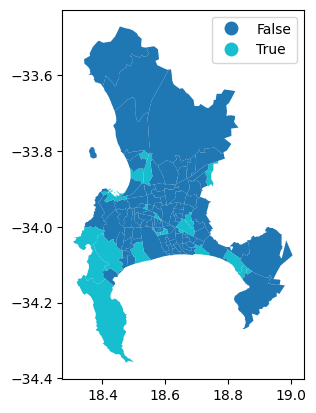

In [68]:
both.plot(column='Gender_Majority', categorical=True, 
          legend=True, linewidth=0.1)

Let us stop for a second in a few crucial aspects:

* Note how we are using the same approach as for basic maps, the command `plot`, but we now need to add the argument `column` to specify which column in particular is to be represented.
* Since the variable is categorical we need to make that explicit by setting the argument `categorical` to `True`.
* As an optional argument, we can set `legend` to `True` and the resulting figure will include a legend with the names of all the values in the map.
* Unless we specify a different colormap, the selected one respects the categorical nature of the data by not implying a gradient or scale but a qualitative structure.

---

##### <div class="exercise"><b>Exercise</b></div>
**Create a categorical map of the marital status in Capetown. Where are the areas with more married than single population?**

---

#### Equal interval <a class="anchor" id="section8_2_2"></a>

If, instead of categorical variables, we want to display the geographical distribution of a continuous phenomenon, we need to select a way to encode each value into a color. One potential solution is applying what is usually called "equal intervals". The intuition of this method is to split the *range* of the distribution, the difference between the minimum and maximum value, into equally large segments and to assign a different color to each of them according to a palette that reflects the fact that values are ordered.

Using the example of the position of a spatial unit in the national ranking of the IMD (`IMD_Rank`), we can calculate these segments, also called bins or buckets, using the library `PySAL` (which we imported at the starting of the section):

In [69]:
classi = mapclassify.EqualInterval(imd['IMD_Rank'])#, k=7)
print(classi)

EqualInterval

      Interval         Count
----------------------------
[   24.00,  6437.20] |    57
( 6437.20, 12850.40] |    22
(12850.40, 19263.60] |    15
(19263.60, 25676.80] |    16
(25676.80, 32090.00] |     6


The only additional argument to pass to `Equal_Interval`, other than the actual variable we would like to classify is the number of segments we want to create, `k`, which we are arbitrarily setting to seven in this case. This will be the number of colors that will be plotted on the map so, although having several can give more detail, at some point the marginal value of an additional one is fairly limited, given the ability of the brain to tell any differences.

Once we have classified the variable, we can check the actual break points where values stop being in one class and become part of the next one:

In [70]:
print(classi.bins)

[ 6437.2 12850.4 19263.6 25676.8 32090. ]


The array of breaking points above implies that any value in the variable below 4604.9 will get the first color in the gradient when mapped, values between 4604.9 and 9185.7 the next one, and so on.

The key characteristic in equal interval maps is that the bins are allocated based on the magnitude on the values, irrespective of how many obervations fall into each bin as a result of it. In highly skewed distributions, this can result in bins with a large number of observations, while others only have a handful of outliers. This can be seen in the submmary table printed out above, where 156 spatial units are in the first group, but only five of them belong to the one with highest values. This can also be represented visually with a kernel density plot where the break points are included as well:

/Users/philip/anaconda3/envs/datascience/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/philip/anaconda3/envs/datascience/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/philip/anaconda3/envs/datascience/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/philip/anaconda3/envs/datascience/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprec

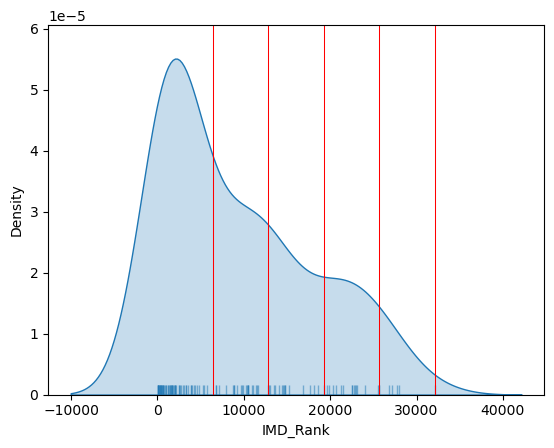

In [71]:
# Set up the figure
f, ax = plt.subplots(1)
# Plot the kernel density estimation (KDE)
sns.kdeplot(imd['IMD_Rank'], fill=True)
# Add a blue tick for every value at the bottom of the plot (rugs)
sns.rugplot(imd['IMD_Rank'], alpha=0.5)
# Loop over each break point and plot a vertical red line
for cut in classi.bins:
    plt.axvline(cut, color='red', linewidth=0.75)
# Display image
plt.show()

Technically speaking, the figure is created by overlaying a KDE plot with vertical bars for each of the break points. This makes much more explicit the issue highlighed by which the first bin contains a large amount of observations while the one with top values only encompasses a handful of them.

To create a map that displays the colors assigned by the equal interval classification algorithm, we use a similar approach as with unique values but with some key differences:

<Axes: >

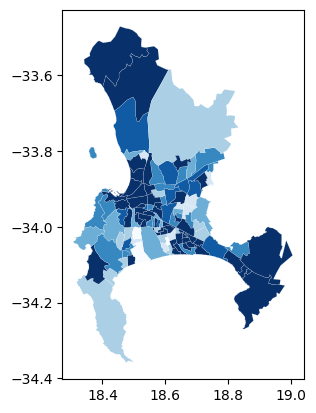

In [72]:
imd.plot(column='IMD_Rank', scheme='equal_interval', k=7, 
         cmap=plt.cm.Blues_r, alpha=1, 
         edgecolor='w', linewidth=0.1)

Pay attention to the key differences:

* Instead of specifying `categorical` as `True`, we replace it by the argument `scheme`, which we will use for all choropleths that require a continuous classification scheme. In this case, we set it to `equal_interval`.
* As above, we set the number of colors to 7. Note that we need not pass the bins we calculated above, the plotting method does it itself under the hood for us.
* As optional arguments, we can change the colormap to a blue gradient, which is one of the recommended ones by [ColorBrewer](http://colorbrewer2.org/) for a sequential palette. **NOTE** also how we use an appropriate palette: `IMD_Rank` goes from most to least deprived to, so we apply a palette (`Blues_r`, where the `_r` stands for reverse) for which the **smaller values are encoded in darker blue**.
* Equally optional, some of the arguments we learned with basic maps, such as the degree of transparency, also apply in this context.

Substantively, the map also makes very explicit the fact that many areas are put into the same bin as the amount of white polygons is very large.

---

##### <div class="exercise"><b>Exercise</b></div>
**Create an equal interval kde plot and map of the actual score of the IMD (`IMD_Score`). Is the same palette appropriate?**

As a bonus, try including a legend in the map, following a similar approach as in unique values maps.

---

#### Quantiles <a class="anchor" id="section8_2_3"></a>

One solution to obtain a more balanced classification scheme is using quantiles. This, by definition, assigns the same amount of values to each bin: the entire series is laid out in order and break points are assigned in a way that leaves exactly the same amount of observations between each of them. This "observation-based" approach contrasts with the "value-based" method of equal intervals and, although it can obscure the magnitude of extreme values, it can be more informative in cases with skewed distributions.

Calculating a quantiles classification with `PySAL` can be done with the following line of code:

In [73]:
classi = mapclassify.Quantiles(imd['IMD_Rank'], k=7)
classi

Quantiles

      Interval         Count
----------------------------
[   24.00,   644.86] |    17
(  644.86,  1950.86] |    16
( 1950.86,  4018.71] |    17
( 4018.71,  9764.57] |    16
( 9764.57, 13678.43] |    17
(13678.43, 20963.00] |    16
(20963.00, 32090.00] |    17

And, similarly, the bins can also be inspected:

In [74]:
classi.bins

array([  644.85714286,  1950.85714286,  4018.71428571,  9764.57142857,
       13678.42857143, 20963.        , 32090.        ])

The visualization of the distribution can be generated in a similar way as well:

/var/folders/x0/nsty_5vx5tb4_z58xnljz1xh0000gn/T/ipykernel_71102/532987664.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(imd['IMD_Rank'], shade=True)
/Users/philip/anaconda3/envs/datascience/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/philip/anaconda3/envs/datascience/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/philip/anaconda3/envs/datascience/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecate

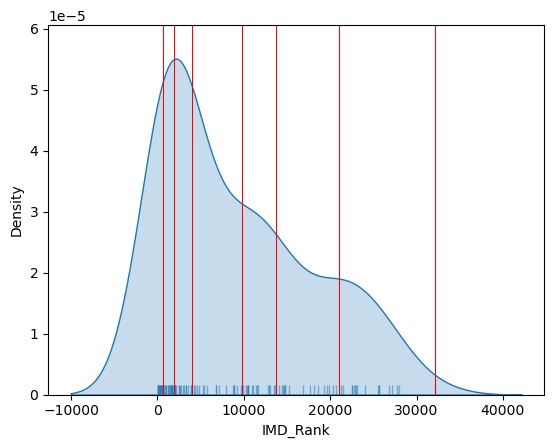

In [75]:
# Set up the figure
f, ax = plt.subplots(1)
# Plot the kernel density estimation (KDE)
sns.kdeplot(imd['IMD_Rank'], shade=True)
# Add a blue tick for every value at the bottom of the plot (rugs)
sns.rugplot(imd['IMD_Rank'], alpha=0.5)
# Loop over each break point and plot a vertical red line
for cut in classi.bins:
    plt.axvline(cut, color='red', linewidth=0.75)
# Display image
plt.show()

And the choropleth also follows a similar pattern, with the difference that we are now using the scheme "quantiles", instead of "equal interval":

<Axes: >

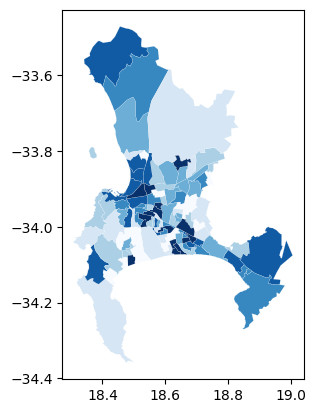

In [76]:
imd.plot(column='IMD_Rank', scheme='QUANTILES', alpha=1, k=7, \
         cmap=plt.cm.Blues_r, 
         edgecolor='w', linewidth=0.1)

Note how, in this case, the amount of polygons in each color is by definition much more balanced (almost equal in fact, except for rounding differences). This obscures outlier values, which get blurred by significantly smaller values in the same group, but allows to get more detail in the "most populated" part of the distribution, where instead of only white polygons, we can now discern more variability.

---

##### <div class="exercise"><b>Exercise</b></div>
**Create a quantile kde plot and map of the actual score of the IMD (`IMD_Score`).**

As a bonus, make a map with 50% of transparency and no boundary lines.

---

#### Fisher-Jenks <a class="anchor" id="section8_2_4"></a>

Equal interval and quantiles are only two examples of very many classification schemes to encode values into colors. Although not all of them are integrated into `geopandas`, `PySAL` includes several other classification schemes (for a detailed list, have a look at this [link](http://pysal.readthedocs.org/en/latest/library/esda/mapclassify.html)). As an example of a more sophisticated one, let us create a Fisher-Jenks choropleth:

In [77]:
classi = mapclassify.FisherJenks(imd['IMD_Rank'], k=7)
classi

FisherJenks

      Interval         Count
----------------------------
[   24.00,  2731.00] |    42
( 2731.00,  7155.00] |    18
( 7155.00, 11656.00] |    18
(11656.00, 15258.00] |    12
(15258.00, 20647.00] |     9
(20647.00, 24024.00] |     9
(24024.00, 32090.00] |     8

This methodology aims at minimizing the variance *within* each bin while maximizing that *between* different classes.

In [78]:
classi.bins

array([ 2731.,  7155., 11656., 15258., 20647., 24024., 32090.])

Graphically, we can see how the break points are not equally spaced but are adapting to obtain an optimal grouping of observations:

/var/folders/x0/nsty_5vx5tb4_z58xnljz1xh0000gn/T/ipykernel_71102/532987664.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(imd['IMD_Rank'], shade=True)
/Users/philip/anaconda3/envs/datascience/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/philip/anaconda3/envs/datascience/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/philip/anaconda3/envs/datascience/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecate

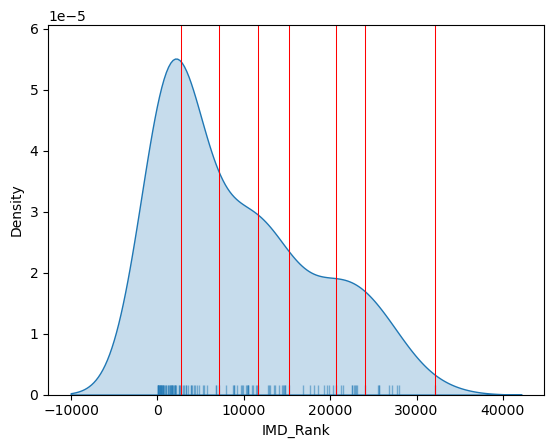

In [79]:
# Set up the figure
f, ax = plt.subplots(1)
# Plot the kernel density estimation (KDE)
sns.kdeplot(imd['IMD_Rank'], shade=True)
# Add a blue tick for every value at the bottom of the plot (rugs)
sns.rugplot(imd['IMD_Rank'], alpha=0.5)
# Loop over each break point and plot a vertical red line
for cut in classi.bins:
    plt.axvline(cut, color='red', linewidth=0.75)
# Display image
plt.show()

Technically, however, the way to create a Fisher-Jenks map is exactly the same as before:

<Axes: >

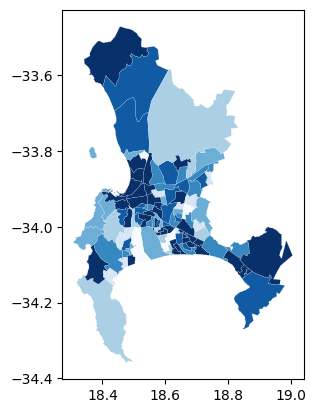

In [80]:
imd.plot(column='IMD_Rank', scheme='fisher_jenks', 
         alpha=1, k=7, cmap=plt.cm.Blues_r, 
         edgecolor='w', linewidth=0.1)